# Javier Cano Salcedo

In [10]:
import pandas as pd
import numpy as np

from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler

#Ejercicio 1
dementiaDataset = pd.read_csv("dementia_dataset.csv")

print("Dataset original:")
display(dementiaDataset)

#Creo que los identificadores de paciente y visita no son importantes para el perceptrón
cleanDementiaDataset = dementiaDataset.drop(columns=["Subject ID", "MRI ID"])

#Elimino las entradas a las que les falte algún valor, que no son muchas
cleanDementiaDataset.dropna(inplace = True)

#Codificar con enteros los valores no numéricos
encoder = OneHotEncoder(sparse_output=False) 

mfCodified = encoder.fit_transform(cleanDementiaDataset["M/F"].to_numpy().reshape(-1, 1))
mfCodified = np.argmax(mfCodified, axis=1)

cleanDementiaDataset["M/F"] = mfCodified

handCodified = encoder.fit_transform(cleanDementiaDataset["Hand"].to_numpy().reshape(-1, 1))
handCodified = np.argmax(handCodified, axis=1)

cleanDementiaDataset["Hand"] = handCodified

#Normalizar la media y desviación típica de todas las pruebas
scaler = StandardScaler()

cleanDementiaDataset["EDUC"] = scaler.fit_transform(cleanDementiaDataset["EDUC"].to_numpy().reshape(-1, 1))
cleanDementiaDataset["SES"] = scaler.fit_transform(cleanDementiaDataset["SES"].to_numpy().reshape(-1, 1)) 
cleanDementiaDataset["MMSE"] = scaler.fit_transform(cleanDementiaDataset["MMSE"].to_numpy().reshape(-1, 1)) 
cleanDementiaDataset["CDR"] = scaler.fit_transform(cleanDementiaDataset["CDR"].to_numpy().reshape(-1, 1)) 
cleanDementiaDataset["eTIV"] = scaler.fit_transform(cleanDementiaDataset["eTIV"].to_numpy().reshape(-1, 1)) 
cleanDementiaDataset["nWBV"] = scaler.fit_transform(cleanDementiaDataset["nWBV"].to_numpy().reshape(-1, 1)) 
cleanDementiaDataset["ASF"] = scaler.fit_transform(cleanDementiaDataset["ASF"].to_numpy().reshape(-1, 1)) 

#Normalizar la visita y el delay
scaler = MinMaxScaler()

cleanDementiaDataset["Visit"] = scaler.fit_transform(cleanDementiaDataset["Visit"].to_numpy().reshape(-1, 1))
cleanDementiaDataset["MR Delay"] = scaler.fit_transform(cleanDementiaDataset["MR Delay"].to_numpy().reshape(-1, 1))

print("Dataset limpio:")
display(cleanDementiaDataset)

Dataset original:


,Subject ID,MRI ID,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,OAS2_0001,OAS2_0001_MR1,Nondemented,1,0,M,R,87,14,2.0,27.0,0.0,1987,0.696,0.883
1,OAS2_0001,OAS2_0001_MR2,Nondemented,2,457,M,R,88,14,2.0,30.0,0.0,2004,0.681,0.876
2,OAS2_0002,OAS2_0002_MR1,Demented,1,0,M,R,75,12,NaN,23.0,0.5,1678,0.736,1.046
3,OAS2_0002,OAS2_0002_MR2,Demented,2,560,M,R,76,12,NaN,28.0,0.5,1738,0.713,1.010
4,OAS2_0002,OAS2_0002_MR3,Demented,3,1895,M,R,80,12,NaN,22.0,0.5,1698,0.701,1.034
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,OAS2_0185,OAS2_0185_MR2,Demented,2,842,M,R,82,16,1.0,28.0,0.5,1693,0.694,1.037
369,OAS2_0185,OAS2_0185_MR3,Demented,3,2297,M,R,86,16,1.0,26.0,0.5,1688,0.675,1.040
370,OAS2_0186,OAS2_0186_MR1,Nondemented,1,0,F,R,61,13,2.0,30.0,0.0,1319,0.801,1.331
371,OAS2_0186,OAS2_0186_MR2,Nondemented,2,763,F,R,63,13,2.0,30.0,0.0,1327,0.796,1.323


Dataset limpio:


,Group,Visit,MR Delay,M/F,Hand,Age,EDUC,SES,MMSE,CDR,eTIV,nWBV,ASF
0,Nondemented,0.00,0.000000,1,0,87,-0.243255,-0.406615,-0.110484,-0.732910,2.831634,-0.896523,-2.274647
1,Nondemented,0.25,0.173172,1,0,88,-0.243255,-0.406615,0.698714,-0.732910,2.928489,-1.293466,-2.325881
5,Nondemented,0.00,0.000000,0,0,88,1.140076,0.476463,0.159249,-0.732910,-1.566725,-0.526043,1.831403
6,Nondemented,0.25,0.203865,0,0,90,1.140076,0.476463,-0.110484,-0.732910,-1.652185,-0.314340,1.963148
7,Nondemented,0.00,0.000000,1,0,80,-0.934921,1.359542,0.159249,-0.732910,1.133822,-0.473117,-1.132857
...,...,...,...,...,...,...,...,...,...,...,...,...,...
368,Demented,0.25,0.319060,1,0,82,0.448410,-1.289694,0.159249,0.618393,1.156611,-0.949449,-1.147496
369,Demented,0.50,0.870405,1,0,86,0.448410,-1.289694,-0.380216,0.618393,1.128125,-1.452243,-1.125538
370,Nondemented,0.00,0.000000,0,0,61,-0.589088,-0.406615,0.698714,-0.732910,-0.974200,1.882078,1.004338
371,Nondemented,0.25,0.289125,0,0,63,-0.589088,-0.406615,0.698714,-0.732910,-0.928621,1.749763,0.945785


He eliminado los identificadores de paciente y visita porque no son importantes para el perceptrón, y he eliminado las entradas incompletas, que no son muchas.
Si hubieran sido más y tuvieramos un dataset más grande, hubiera inferido el valor usando la media.
He codificado el sexo y la mano con 0 y 1 para que el perceptrón pueda manejarlos.
He normalizado los datos médicos para que tengan media 0 y desviación típica 1 para facilitar el trabajo al perceptrón

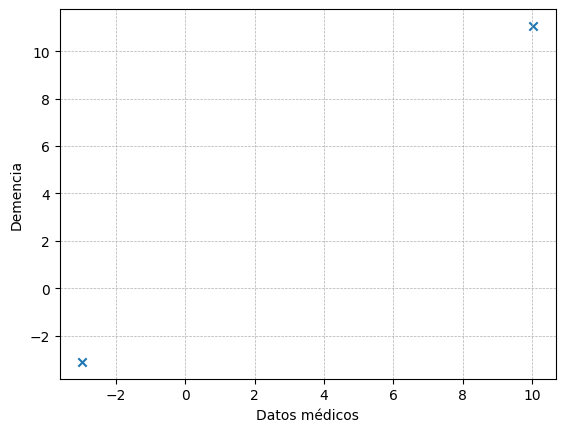

In [37]:
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

#Ejercicio 2
medicalData = cleanDementiaDataset.drop(columns=["Group"])
#display(medicalData)

medicalData = PCA(n_components=2).fit_transform(medicalData)
#display(medicalData)

plt.xlabel('Datos médicos')
plt.ylabel('Demencia')
plt.grid(True, which='both', linestyle='--', linewidth=0.5)

plt.scatter(medicalData[0], medicalData[1], marker='x')

plt.show()

In [12]:
from ann import cost, cost_regL2, backprop, backprop2, predict, feedForward
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error

import numpy as np

#Ejercicio 3
X = cleanDementiaDataset.drop(columns=["Group"])
y = encoder.fit_transform(cleanDementiaDataset[["Group"]])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

def perceptron(layer_sizes):
    epsilon = 0.12
    theta_list = []

    for i in range(len(layer_sizes) - 1):
        theta_list.append(np.random.rand(layer_sizes[i + 1], layer_sizes[i] + 1) * 2 * epsilon - epsilon)

    iterations = 1000
    lambda_ = 1
    alpha = .01

    for i in range(iterations):
        cost, grads = backprop(theta_list, X_train, y_train, lambda_)

        for j in range(len(theta_list)):
            theta_list[j] -= alpha * grads[j]

    predictions = predict(theta_list, X_test)
    accuracy = accuracy_score(np.argmax(y_test, axis=1), predictions)
    print(f'Precisión del perceptrón: {accuracy * 100:.2f}%')

    conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predictions)
    print(f'Matriz de confusión:\n {conf_matrix}')

    mse = mean_squared_error(np.argmax(y_test, axis=1), predictions)
    print(f'Error cuadratico medio: {mse:.2f} \n')

#Pruebas de perceptron
print("PRUEBAS DE PERCEPTRON. El resultado final está en la siguiente celda")
perceptron([X.shape[1], 10, y.shape[1]])
perceptron([X.shape[1], 100, y.shape[1]])
perceptron([X.shape[1], 500, y.shape[1]])
perceptron([X.shape[1], 10, 10, y.shape[1]])
perceptron([X.shape[1], 100, 100, y.shape[1]])

PRUEBAS DE PERCEPTRON. El resultado final está en la siguiente celda
Precisión del perceptrón: 55.06%
Matriz de confusión:
 [[ 0  0  9]
 [ 0  0 31]
 [ 0  0 49]]
Error cuadratico medio: 0.75 

Precisión del perceptrón: 71.91%
Matriz de confusión:
 [[ 0  0  9]
 [ 0 15 16]
 [ 0  0 49]]
Error cuadratico medio: 0.58 

Precisión del perceptrón: 74.16%
Matriz de confusión:
 [[ 0  6  3]
 [ 0 31  0]
 [ 0 14 35]]
Error cuadratico medio: 0.36 

Precisión del perceptrón: 55.06%
Matriz de confusión:
 [[ 0  0  9]
 [ 0  0 31]
 [ 0  0 49]]
Error cuadratico medio: 0.75 

Precisión del perceptrón: 55.06%
Matriz de confusión:
 [[ 0  0  9]
 [ 0  0 31]
 [ 0  0 49]]
Error cuadratico medio: 0.75 



Tras probar los distintos modelos, escojo el modelo con una sola capa oculta de 100 neuronas.

In [13]:
perceptron([X.shape[1], 100, y.shape[1]])

Precisión del perceptrón: 71.91%
Matriz de confusión:
 [[ 0  0  9]
 [ 0 15 16]
 [ 0  0 49]]
Error cuadratico medio: 0.58 



In [14]:
from sklearn.tree import DecisionTreeClassifier

#Ejercicio 4
id3_classifier = DecisionTreeClassifier(random_state=42)
id3_classifier.fit(X_train, np.argmax(y_train, axis=1))

predictions = id3_classifier.predict(X_test)

accuracy = accuracy_score(np.argmax(y_test, axis=1), predictions)
print(f'Precisión del ID3: {accuracy * 100:.2f}%')

conf_matrix = confusion_matrix(np.argmax(y_test, axis=1), predictions)
print(f'Matriz de confusión:\n {conf_matrix}')

mse = mean_squared_error(np.argmax(y_test, axis=1), predictions)
print(f'Error cuadrático medio: {mse:.2f} \n')

Precisión del ID3: 86.52%
Matriz de confusión:
 [[ 3  2  4]
 [ 4 27  0]
 [ 2  0 47]]
Error cuadrático medio: 0.34 



## Ejercicio 5
Decision Tree tiene una precisión superior a la del perceptrón (86% frente a 73%). Decision Tree tiene la ventaja de ser una algoritmo de caja blanca, lo que puede ayudar para convertir el modelo en reglas que los médicos puedan usar y comprender.

Además, en este caso, la precisión es muy importante ya que de este resultado depende la salud de las personas, por lo que eligiría Decision Tree para este problema.


In [15]:
#Ejercicio 6
X = cleanDementiaDataset.drop(columns=["Group"])
y = encoder.fit_transform(cleanDementiaDataset[["Group"]].replace("Converted", "Demented"))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=8)

perceptron([X.shape[1], 100, 2])

Precisión del perceptrón: 79.78%
Matriz de confusión:
 [[22 18]
 [ 0 49]]
Error cuadratico medio: 0.20 

